# plotting MPI-ESM ocean

In [1]:
%load_ext lab_black

In [2]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
p = "/work/mj0060/m300413/mpiesm-1.2.01p5/experiments/awi0069_cmor/archive/CMIP6/CMIP/MPI-M/MPI-ESM1-2-LR/esm-hist/r1i1p1f1/Omon/fgco2/gn/v20190710/fgco2_Omon_MPI-ESM1-2-LR_esm-hist_r1i1p1f1_gn_185001-186912.nc"

In [4]:
da = xr.open_dataset(p)["fgco2"].isel(time=3)

In [5]:
da.coords

Coordinates:
    time       datetime64[ns] 1850-04-16
  * j          (j) int32 0 1 2 3 4 5 6 7 8 ... 212 213 214 215 216 217 218 219
  * i          (i) int32 0 1 2 3 4 5 6 7 8 ... 248 249 250 251 252 253 254 255
    latitude   (j, i) float64 ...
    longitude  (j, i) float64 ...
    depth      float64 ...

## xarray default
uses dimensions, here `i` and `j`

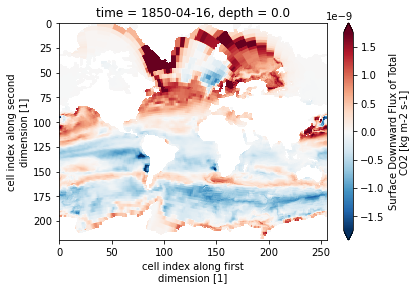

In [6]:
da.plot(robust=True, yincrease=False)

## xarray with cartopy
understands coordinates, here `latitude` and `longitude`

/work/mh0727/m300524/conda-envs/pymistral/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


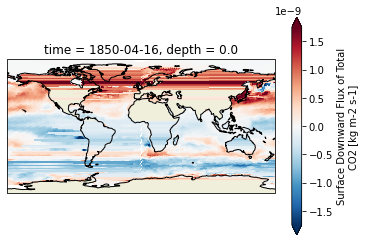

In [7]:
import cartopy.crs as ccrs
import cartopy

ax = plt.axes(projection=ccrs.PlateCarree())
da.plot(y="latitude", x="longitude", ax=ax, transform=ccrs.PlateCarree(), robust=True)
ax.set_global()
ax.coastlines()
ax.add_feature(cartopy.feature.LAND)

### pymistral.plot_map

In [8]:
import pymistral

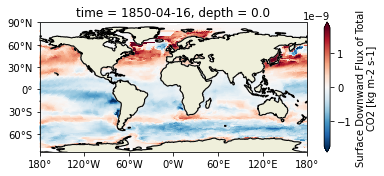

In [9]:
da.plot_map(feature="land")

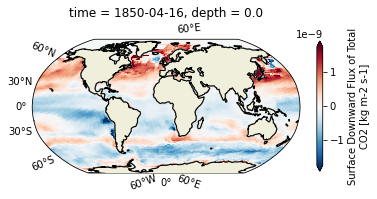

In [10]:
da.plot_map(feature="land", proj="Robinson")

In [11]:
da = xr.open_dataset(p)["fgco2"].isel(time=[0, 1, 2])

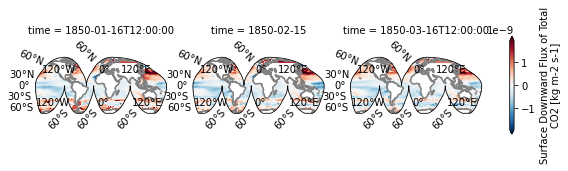

In [12]:
da.plot_map(col="time", proj="InterruptedGoodeHomolosine")

# other curvilinear output

`plot_map` finds `longitude` and `latitude` based on `coords.attrs`

In [ ]:
import climpred

climpred.tutorial.load_dataset("FOSI-SST-3D").SST.isel(time=-1).plot_map()